<a href="https://colab.research.google.com/github/dahlia52/ESAA_2022-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%EC%BD%98%ED%85%90%EC%B8%A0_%EA%B8%B0%EB%B0%98_%ED%95%84%ED%84%B0%EB%A7%81_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 ch9. 5 pg. 579~590

# 05 콘텐츠 기반 필터링 실습 - TMDB 5000 영화 데이터 세트

### 장르 속성을 이용한 영화 콘텐츠 기반 필터링

- **콘텐츠 기반 필터링**: 사용자가 특정 영화를 감상하고 그 영화를 좋아했다면 그 영화와 비슷한 특성/속성, 구성 요소 등을 가진 다른 영화를 추천하는 것. 영화(상품/서비스) 간의 유사성을 판단하는 기준이 영화를 구성하는 다양한 콘텐츠(장르, 감독, 배우, 평점, 키워드, 영화 설명)를 기반으로 하는 방식

### 데이터 로딩 및 가공

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

movies = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/tmdb_5000_movies.csv')
print(movies.shape)
movies.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United ...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": ...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""US"", ""name"": ""United States of ...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""name"": ""te...",en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""DC E...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fic...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"": 839, ""name"": ""mars""}, {""id"": 1456, ""name"": ""medal...",en,John Carter,"John Carter is a war-weary, former military captain who's inexplicably transported to the myster...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of Ameri

In [15]:
# 콘텐츠 기반 필터링 추천 분석에 사용할 주요 칼럼: id, title, genres, vote_average, vote_count, popularity, keywords, overview
movies_df = movies[['id','title','genres','vote_average','vote_count','popularity','keywords','overview']]

In [16]:
pd.set_option('max_colwidth',100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [17]:
from ast import literal_eval
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [18]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


### 장르 콘텐츠 유사도 측정

**genres 칼럼을 기반으로 하는 콘텐츠 기만 필터링**

- 문자열로 변환된 genres 칼럼을 Count 기반으로 피처 벡터화 변환함.

- genres 문자열을 피처 벡터화 행렬로 변환한 데이터 세트를 코사인 유사도를 통해 비교함. 이를 위해 데이터세트의 레코드별로 타 레코드와 장르에서 코사인 유사도 값을 가지는 객체를 생성함.

- 장르 유사도가 높은 영화 중에 평점이 높은 순으로 영화를 추천해줌.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열 변환
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x: (' '.join(x)))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:1])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]]


In [26]:
# 유사도를 높은 순으로 정렬한 인덱스
genre_sim_sorted_ind = genre_sim.argsort()[:,::-1]
print(genre_sim_sorted_ind[:1]) # 0번 레코드는 3494번, 813번 레코드 순으로 유사도가 높음.

[[   0 3494  813 ... 3038 3037 2401]]


### 장르 콘텐츠 필터링을 이용한 영화 추천


In [32]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
  # 인자로 입력된 moview_df DataFrame에서 'title' 칼럼이 입력된 title_name 값인 DataFrame 추출
  title_movie = df[df['title']==title_name]

  # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고
  # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n개의 index 추출
  title_index = title_movie.index.values
  similar_indexes = sorted_ind[title_index, :(top_n)]

  # 추출된 top_n index 출력. top_n index는 2차원 데이터임.
  # dataframe에서 index로 사용하기 위해서 1차원 array로 변경
  print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)

  return df.iloc[similar_indexes]

In [33]:
find_sim_movie(movies, genre_sim_sorted_ind, 'The Godfather')
# 비슷한 유형의 영화도 추천되었지만, 평점이 낮은 영화도 많음. 
# -> 더 많은 후보군을 선정한 뒤에 영화의 평점에 따라 필터링해서 최종 추천하는 방식 이용

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2731,13000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",NaN,240,"[{""id"": 700, ""name"": ""italo-american""}, {""id"": 701, ""name"": ""cuba""}, {""id"": 1950, ""name"": ""voror...",en,The Godfather: Part II,"In the continuing saga of the Corleone crime family, a young Vito Corleone grows up in Sicily an...",105.792936,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""name"": ""The Coppola Company"", ""id"": 536}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1974-12-20,47542841,200.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""iso_639_1"": ...",Released,"I don't feel I have to wipe everybody out, Tom. Just my enemies.",The Godfather: Part II,8.3,3338
1243,500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",NaN,203,"[{""id"": 1944, ""name"": ""epilepsy""}, {""id"": 2236, ""name"": ""protection money""}, {""id"": 7879, ""name""...",en,Mean Streets,"A small-time hood must choose from among love, friendship and the chance to rise within the mob.",17.002096,"[{""name"": ""Scorsese Productions"", ""id"": 120}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1973-10-02,3000000,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""it"", ""name"": ""Italiano""}]",Released,You don't make up for your sins in church. You do it in the streets...,Mean Streets,7.2,345
3636,5000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",NaN,36351,"[{""id"": 236, ""name"": ""suicide""}, {""id"": 2231, ""name"": ""drug dealer""}, {""id"": 11436, ""name"": ""red...",en,Light Sleeper,A drug dealer with upscale clientele is having moral problems going about his daily deliveries. ...,6.063868,"[{""name"": ""Fine Line Features"", ""id"": 8}, {""name"": ""Live Entertainment"", ""id"": 285}, {""name"": ""S...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1992-08-21,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He was a good man in a deadly business. She was his only way out.,Light Sleeper,5.7,15
1946,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",NaN,11699,"[{""id"": 796, ""name"": ""police brutality""}, {""id"": 10291, ""name"": ""organized crime""}, {""id"": 33699...",en,The Bad Lieutenant: Port of Call - New Orleans,"Terrence McDonagh, a New Orleans Police sergeant, who starts out as a good cop, receiving a meda...",17.339852,"[{""name"": ""Saturn Films"", ""id"": 831}, {""name"": ""Nu Image Films"", ""id"": 925}, {""name"": ""Edward R....","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2009-09-11,10589102,122.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, {""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The only criminal he can't catch is himself.,The Bad Lieutenant: Port of Call - New Orleans,6.0,326
2640,8000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",NaN,400,"[{""id"": 494, ""name"": ""father son relationship""}, {""id"": 801, ""name"": ""bounty hunter""}, {""id"": 14...",en,Things to Do in Denver When You're Dead,A mafia film in Tarantino style with a star-studded cast. Jimmy’s “The Saint” gangster career ha...,6.932221,"[{""name"": ""Miramax Films"", ""id"": 14}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1995-12-01,529766,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Protect. Love. Honor. Avenge.,Things to Do in Denver When You're Dead,6.7,85
4065,2100000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",http://miamericamovie.net/,364083,"[{""id"": 40865, ""name"": ""new york state""}, {""id"": 160335, 

In [35]:
# 영화 평점에 참여한 관객수도 고려해야 함. 소수의 관객이 만점이나 매우 높은 평점을 부여해 왜곡된 데이터를 가질 수도 있음.
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


### 새롭게 평점 부여 - 가중 평점의 공식

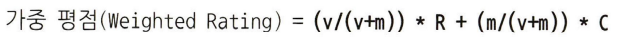

- v: 개별 영화에 평점을 투표한 횟수

- m: 평점을 부여하기 위한 최소 투표 횟수

- R: 개별 영화에 대한 평균 평점

- C: 전체 영화에 대한 평균 평점

In [37]:
C = movies_df['vote_average'].mean()
# m은 전체 투표 횟수에서 상위 60%에 해당하는 횟수로 선정
m = movies_df['vote_count'].quantile(0.6)
print("C:", round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


In [45]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
  v = record['vote_count']
  R = record['vote_average']

  return (v/(v+m)) * R + (m/(v+m)) * C

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)

In [46]:
movies_df[['title', 'vote_average', 'weighted_vote', 'vote_count']].sort_values('weighted_vote', ascending=False)[:10].sort_values('weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [48]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
  title_movie = df[df['title'] == title_name]
  title_index = title_movie.index.values

  # top_n의 2배에 해당하는 장르 유사성이 높은 인덱스 추출
  similar_indexes = sorted_ind[title_index, :(top_n*2)]
  similar_indexes = similar_indexes.reshape(-1)
  # 기준 영화 인덱스 제외
  similar_indexes = similar_indexes[similar_indexes != title_index]
  # top_n의 2배에 해당하는 후보군에서 weighted_vote가 높은 순으로 top_n만큼 추출
  return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather')
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427
